# Healthcare Marketing Analytics Project
## Determining the impact of R&D Ration on Healthcare Firms' Value

In [131]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter("once")

### Data Sourcing
This dataset was provided by Bocconi University, Marketing Analytics department. Here is the description of the data columns in the dataset:
- Firm ID (variable name: id)
- Year (variable name: year)
- Firm Total Assets (unit: million $) (variable name: assets)
- Long-term Debt (unit: million $) (variable name: debt)
- Earnings (unit: million $): This variable is EBITA (earnings before interest, taxes, depreciation,
and amortization). (variable name: earnings)
- Cash Flows (unit: million $): This is Net Cash Flow from Operating Activity. However, please
conceptually consider this variable a proxy for profit based on only cash as some academic
studies do. (variable name: cashflow)
- Sales (unit: million $) (variable name: sales)
- Advertising Expenditure (unit: million $): Conceptually, you can consider this variable as a firm’s
brand building effort. (variable name: ad)
- R&D Expenditure (unit: million $): Conceptually, you can consider this variable as a firm’s
innovation effort. (variable name: rd)
- Marketing, Selling, and Operating Expenditure (unit: million $): Conceptually, you can consider
this variable as a firm’s selling and marketing effort (e.g., sale forces, customer management)
except advertising. Note that this variable does not include advertising expenditure and R&D
expenditure. (variable name: mkt)
- Product Market Threat: Consider this variable as competitive threats that a firm goes through in
its product markets. Higher values indicate higher levels of competitive threats. (variable name:
threat)
- 2001 Recession (dummy): 1 if the observation is in the year of 2001 recession and 0 otherwise.
(variable name: rec1)
- 2008 Recession (dummy): 1 if the observation is in the year of 2008 recession and 0 otherwise.
(variable name: rec2)
- Firm Value (i.e., Tobin’s Q) (variable name: fv)
- Market Valuation (unit: million $): Market value of a firm (variable name: mv)
- Business sector where a firm operates (indicator) (variable name: sector)
    - 1: Manufacturing (Consumer Durables and Non-Durables) e.g., Food, Tobacco, Textile, Apparel, Toys, Cars, TVs, Furniture, Appliances
    - 2: Manufacturing (Non-Consumer Goods) e.g., Machinery, Office Furniture, Paper, Computers, Electronic Equipment
    - 3: Wholesale
    - 4: Retailing
    - 5: Healthcare e.g., healthcare, medical equipment, drugs
    - 6: Information Technology e.g., software publishers, telecommunications, web search portals
    - 7: Service Sector (Technical Services, Professional and Administrative Services, and Education Services)
    - 8: Entertainment, Accommodation, and Full Service Restaurants

In [132]:
all_data = pd.read_csv('marketing_insight.csv')
all_data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,sector
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042,5
1,2607,1993,18.897,0.716,-2.458,-2.016,26.274,10.802283,0.748,1.310,18.0228,0.083362,0,0,5.405,1
2,1204,1993,37.476,23.735,4.359,-0.087,63.938,29.856251,0.759,0.542,1.0184,1.225564,0,0,9.997,3
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089,5
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994,5


In [133]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22723 entries, 0 to 22722
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        22723 non-null  int64  
 1   year      22723 non-null  int64  
 2   assets    22723 non-null  float64
 3   debt      22723 non-null  float64
 4   earnings  22723 non-null  float64
 5   cashflow  22723 non-null  float64
 6   sales     22723 non-null  float64
 7   mv        22723 non-null  float64
 8   ad        22723 non-null  float64
 9   rd        22723 non-null  float64
 10  threat    22723 non-null  float64
 11  fv        22723 non-null  float64
 12  rec1      22723 non-null  int64  
 13  rec2      22723 non-null  int64  
 14  mkt       22723 non-null  float64
 15  sector    22723 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 2.8 MB


#### Filtering out the Healthcare Sector
This project will be focused on the Healthcare sector, therefore, we'll filter out other sectors to remain with **sector 5** – ***Healthcare***.

In [134]:
data = all_data[all_data['sector']==5] #Filtering out all sectors to remain with healthcare data
data = data.drop(['sector'], axis=1) #Delete the sector column as it is no longer relevant
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,2.646077,0,0,11.487
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,3.027747,0,0,1.558


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3292 entries, 0 to 22569
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        3292 non-null   int64  
 1   year      3292 non-null   int64  
 2   assets    3292 non-null   float64
 3   debt      3292 non-null   float64
 4   earnings  3292 non-null   float64
 5   cashflow  3292 non-null   float64
 6   sales     3292 non-null   float64
 7   mv        3292 non-null   float64
 8   ad        3292 non-null   float64
 9   rd        3292 non-null   float64
 10  threat    3292 non-null   float64
 11  fv        3292 non-null   float64
 12  rec1      3292 non-null   int64  
 13  rec2      3292 non-null   int64  
 14  mkt       3292 non-null   float64
dtypes: float64(11), int64(4)
memory usage: 411.5 KB


In [136]:
data.describe()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt
count,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000
mean,1724.311665,2007.315614,3429.609149,775.250014,563.978191,418.321345,1706.000846,6780.085848,71.307075,255.238051,8.154948,2.360336,0.034933,0.045261,408.670110
std,1058.535967,7.179453,16334.438091,3832.730215,2663.596820,2038.262931,7211.308404,29286.544040,354.174284,1154.296713,11.103680,2.746864,0.183638,0.207908,1715.608140
min,1.000000,1993.000000,0.404000,0.000000,-666.676000,-635.442000,0.000000,0.809150,0.000000,0.000000,1.000000,-0.586277,0.000000,0.000000,-1895.591100
25%,774.000000,2002.000000,34.815250,0.000000,-5.244250,-4.947750,26.508250,52.787131,0.288000,1.748750,1.294500,0.861938,0.000000,0.000000,12.847250
50%,1584.000000,2007.000000,109.109000,1.957500,4.940000,3.104500,84.768000,207.849600,1.103000,6.816000,3.197450,1.604317,0.000000,0.000000,34.998501
75%,2629.000000,2013.000000,495.226000,65.151500,58.128250,39.787500,354.252500,1014.843800,6.500000,30.600500,10.694725,2.901638,0.000000,0.000000,119.889250
max,3523.000000,2019.000000,212949.000000,63226.000000,28795.000000,23416.000000,82059.000000,384003.780000,4000.000000,12245.000000,85.363701,45.089115,1.000000,1.000000,19088.000000


In [137]:
#creating log asset variable
data['log assets'] = np.log(data['assets'])
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,log assets
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042,1.411718
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089,2.064582
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994,3.198510
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,2.646077,0,0,11.487,2.327083
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,3.027747,0,0,1.558,1.792925


In [138]:
data['mkt share'] = data['sales']/np.sum(data['sales'])*100
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,log assets,mkt share
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042,1.411718,0.000064
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089,2.064582,0.000096
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994,3.198510,0.000766
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,2.646077,0,0,11.487,2.327083,0.000000
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,3.027747,0,0,1.558,1.792925,0.000124


In [ ]:
data['mkt growth'] = 

In [139]:
#defining firm value.
data['fv'] = data['mv']/data['log assets']
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,log assets,mkt share
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,45.103896,0,0,2.042,1.411718,0.000064
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,28.288539,0,0,6.089,2.064582,0.000096
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,65.050605,0,0,9.994,3.198510,0.000766
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,10.303889,0,0,11.487,2.327083,0.000000
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,11.122982,0,0,1.558,1.792925,0.000124


In [143]:
# Split the data into training set and testing set, using a test size of 0.2.
from sklearn.model_selection import train_test_split
data_features = data.drop(labels=['id','debt','ad','rd','threat','fv','mkt','earnings','assets','cashflow','sales','mv','rec1', 'rec2'], axis=1)
data_dependent = data['fv']
X_train, X_test, y_train, y_test = train_test_split(data_features, data_dependent, test_size=0.2, random_state=42)

In [153]:
n_features = data_features.shape[1]
data_features.head()

,year,log assets,mkt share
0,1993,1.411718,0.000064
3,1993,2.064582,0.000096
4,1993,3.198510,0.000766
10,1993,2.327083,0.000000
19,1993,1.792925,0.000124


Text(0.5, 1.0, 'Correlation Heatmap')

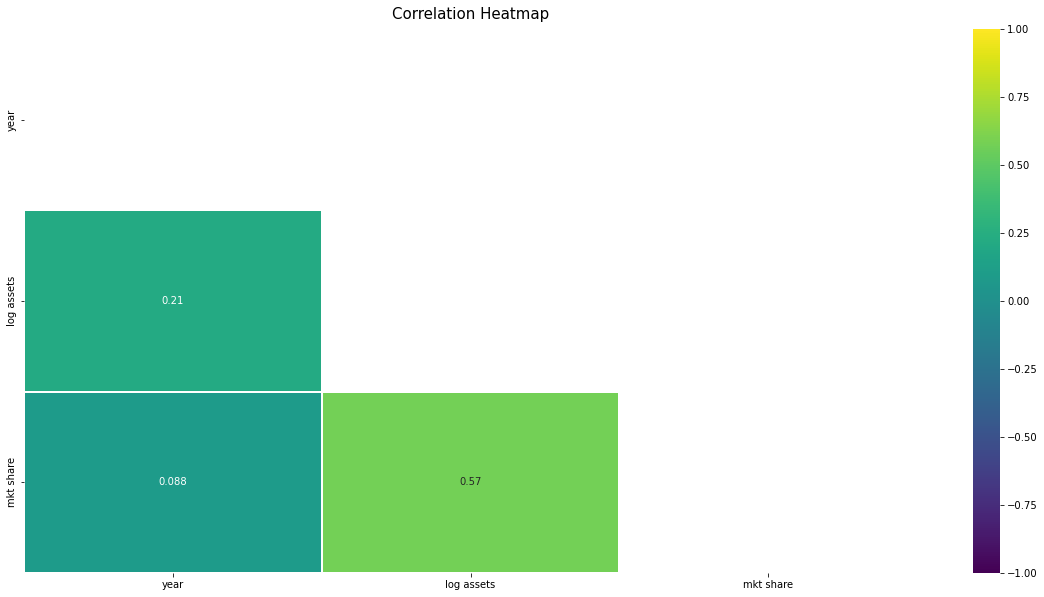

In [154]:
# Create a correlation matrix to check if it is necessary to use PCA.
import seaborn as sn
corr_matrix = data_features.corr()

plt.figure(figsize=(20, 10))

mask = np.triu(np.ones_like(corr_matrix))
heatmap = sn.heatmap(corr_matrix, vmin=-1, annot=True, vmax=1, linewidths=0.1, center=0,cmap= 'viridis', mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=10)


In [155]:
# We now check the variance captured by PCA for different number of components.
from sklearn.decomposition import PCA

for i in range(1, n_features):
    pca = PCA(n_components=i)
    pca.fit_transform(data_features)
    expl_var_ratio = pca.explained_variance_ratio_ 
    print('n. of components:', i, 'explained var. ratio:', expl_var_ratio.sum())
    if expl_var_ratio.sum() >= 0.95:
        break

n. of components: 1 explained var. ratio: 0.9194207683608494
n. of components: 2 explained var. ratio: 0.9998042313357378


In [ ]:
for company_id in data.id.unique():
    for year in data.year.unique():
        current = data.loc[data['id'] == company_id].loc[data.loc[data['id'] == company_id]['year'] == year].mv
        past = data.loc[data['id'] == company_id].loc[data.loc[data['id'] == company_id]['year'] == year-1].mv

        if current.shape[0] == 1 and past.shape[0] == 1:
            growth = (current.values[0]-past.values[0])/past.values[0]
            data.at[data.loc[data['id'] == company_id].loc[data.loc[data['id'] == company_id]['year'] == year-1].index[0], 'mkt_growth'] = growth

data.head()

data['mkt_growth']





In [37]:
data_42 = data[data['id']==42] 
print('company 42:'), data_42['year']

data_899 = data[data['id']==899] 
print('company 899:'), data_899['year']


data_1746 = data[data['id']==1746] 
print('company 1746:'), data_1746['year']
#We notice that data is provided for different n. of years depending on the company.
#Therefore, we need to account for this when calculating market growth.

company 42:


(None,
 0    1993
 Name: year, dtype: int64)

In [88]:
by_company_mv = {}
for company in data['id']:
    data_company = data[data['id']==company]
    by_company_mv[company] = data_company.year, data_company.mv


        
by_company_mv

for company in by_company_mv:
    mv = by_company_mv[company][1]
    for year in by_company_mv[company][0]:
        mkt growth = mv

SyntaxError: invalid syntax (4240362462.py, line 13)

In [ ]:
 print(data.at[data.loc['year'] == year.index[0], 'mkt_growth'])
    
data.at[year, 'mkt_growth'] = (current-past)/past
data.head()

growth = (current.values[0]-past.values[0])/past.values[0]

            data.at[data.loc[data['id'] == company_id].loc[data.loc[data['id'] == company_id]['year'] == year-1].index[0], 'mkt_growth'] = growth